In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score


In [2]:
data = pd.read_csv("base_datos_2008.csv")

In [3]:
df = data.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1).head(5000) #Selección aleatoria

df = df.reset_index() #Importante para la selección aleatoria

X = df[['AirTime', 'Distance', 'DepDelay']]
Y = df['ArrDelay']

In [4]:
df.head()

,index,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,6320842,2008,11,11,2,607.0,615,905.0,914,NW,...,7.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,5698776,2008,10,25,6,708.0,710,828.0,831,EV,...,6.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2443101,2008,5,19,1,1359.0,1400,1717.0,1735,WN,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2835397,2008,5,6,2,1741.0,1724,1938.0,1911,NW,...,3.0,26.0,0,NaN,0,17.0,0.0,10.0,0.0,0.0
4,997457,2008,2,7,4,1639.0,1645,1848.0,1855,MQ,...,6.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


## Validación interna vs externa

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state = 10)

In [6]:
rl = linear_model.LinearRegression()
rl.fit(X, Y)
predic_interna = rl.predict(X)
print(f'R2: {r2_score(Y, predic_interna)}')

R2: 0.8716914434077168


In [7]:
rl_ext = linear_model.LinearRegression()
rl_ext.fit(X_train, y_train)
predic_ext = rl_ext.predict(X_test)
print(f'R2: {r2_score(y_test, predic_ext)}')

R2: 0.8519447925729472


#### El objetivo que no se dio

La idea era mostrar el sobreajuste que puede producir utilizar todo el dataset para entrenar. Tendria que ver el calculo del score, pero 1 es el mejor numero, en este caso puntual el modelo actuo mejor seccionado, entonces el dato seguramente no tiene un comportamiento muy lineal


## Uso de Kfold -> Validación externa

Es muy importante resetear los indices para usar este metodo

In [8]:
kf = KFold(n_splits = 10, shuffle = True)

In [9]:
kf.get_n_splits(X)

10

In [12]:
regr = linear_model.LinearRegression()

resultados = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index,], X.loc[test_index,]
    y_train, y_test = Y[train_index], Y[test_index]
    regr.fit(X_train, y_train)
    predicciones = regr.predict(X_test)
    print(f'R2: {r2_score(y_test, predicciones)}')
    resultados.append(r2_score(y_test, predicciones))

print(f'R2 medio: {np.mean(r2_score(y_test, predicciones))}')

R2: 0.8831019213872466
R2: 0.85770440730802
R2: 0.8905154192637246
R2: 0.8319764452779644
R2: 0.8285163535235609
R2: 0.8736478366564989
R2: 0.8547889431798832
R2: 0.9057664237234249
R2: 0.896456624436056
R2: 0.8881658637152264
R2 medio: 0.8881658637152264


En este caso dividimos el conjunto en 10 secciones y evaluamos el R2 de estos subgrupos, asi podemos ver la variabilidad y un valor mas representativo

## Leave one out -> Validación externa

Es muy importante resetear los indices para usar este metodo

In [18]:
loo = LeaveOneOut()

In [21]:
regr = linear_model.LinearRegression()

resultado = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.loc[train_index,], X.loc[test_index,]
    y_train, y_test = Y[train_index], Y[test_index]
    regr.fit(X_train, y_train)
    predicciones = regr.predict(X_test)
    resultado.append((y_test - predicciones[0])**2)
    print(f'Error cuadratico medio: {(y_test - predicciones[0])**2}')
    

Error cuadratico medio: 0    12.209426
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1    3.305941
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2    131.851588
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3    1.996439
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4    109.844237
Name: ArrDelay, dtype: float64
Error cuadratico medio: 5    11.5392
Name: ArrDelay, dtype: float64
Error cuadratico medio: 6    13.402251
Name: ArrDelay, dtype: float64
Error cuadratico medio: 7    1.834929
Name: ArrDelay, dtype: float64
Error cuadratico medio: 8    791.07509
Name: ArrDelay, dtype: float64
Error cuadratico medio: 9    11.131036
Name: ArrDelay, dtype: float64
Error cuadratico medio: 10    186.288615
Name: ArrDelay, dtype: float64
Error cuadratico medio: 11    29.259669
Name: ArrDelay, dtype: float64
Error cuadratico medio: 12    45.97626
Name: ArrDelay, dtype: float64
Error cuadratico medio: 13    6.323883
Name: ArrDelay, dtype: float64
Error cuadratico med

Error cuadratico medio: 145    5.896539
Name: ArrDelay, dtype: float64
Error cuadratico medio: 146    272.25881
Name: ArrDelay, dtype: float64
Error cuadratico medio: 147    25.635123
Name: ArrDelay, dtype: float64
Error cuadratico medio: 148    83.808303
Name: ArrDelay, dtype: float64
Error cuadratico medio: 149    49.709034
Name: ArrDelay, dtype: float64
Error cuadratico medio: 150    4.832003
Name: ArrDelay, dtype: float64
Error cuadratico medio: 151    100.798791
Name: ArrDelay, dtype: float64
Error cuadratico medio: 152    296.504246
Name: ArrDelay, dtype: float64
Error cuadratico medio: 153    773.482643
Name: ArrDelay, dtype: float64
Error cuadratico medio: 154    16.970669
Name: ArrDelay, dtype: float64
Error cuadratico medio: 155    70.298762
Name: ArrDelay, dtype: float64
Error cuadratico medio: 156    50.284593
Name: ArrDelay, dtype: float64
Error cuadratico medio: 157    55.026267
Name: ArrDelay, dtype: float64
Error cuadratico medio: 158    8.421621
Name: ArrDelay, dtype: 

Error cuadratico medio: 282    5.024931
Name: ArrDelay, dtype: float64
Error cuadratico medio: 283    8.763151
Name: ArrDelay, dtype: float64
Error cuadratico medio: 284    47.04647
Name: ArrDelay, dtype: float64
Error cuadratico medio: 285    132.490032
Name: ArrDelay, dtype: float64
Error cuadratico medio: 286    1.293349
Name: ArrDelay, dtype: float64
Error cuadratico medio: 287    125.924089
Name: ArrDelay, dtype: float64
Error cuadratico medio: 288    217.347219
Name: ArrDelay, dtype: float64
Error cuadratico medio: 289    81.734356
Name: ArrDelay, dtype: float64
Error cuadratico medio: 290    160.370358
Name: ArrDelay, dtype: float64
Error cuadratico medio: 291    195.072043
Name: ArrDelay, dtype: float64
Error cuadratico medio: 292    17.687497
Name: ArrDelay, dtype: float64
Error cuadratico medio: 293    370.820639
Name: ArrDelay, dtype: float64
Error cuadratico medio: 294    29.992716
Name: ArrDelay, dtype: float64
Error cuadratico medio: 295    5.122734
Name: ArrDelay, dtype:

Error cuadratico medio: 422    0.138592
Name: ArrDelay, dtype: float64
Error cuadratico medio: 423    322.225035
Name: ArrDelay, dtype: float64
Error cuadratico medio: 424    16.557799
Name: ArrDelay, dtype: float64
Error cuadratico medio: 425    296.156224
Name: ArrDelay, dtype: float64
Error cuadratico medio: 426    549.669465
Name: ArrDelay, dtype: float64
Error cuadratico medio: 427    1434.130334
Name: ArrDelay, dtype: float64
Error cuadratico medio: 428    169.792231
Name: ArrDelay, dtype: float64
Error cuadratico medio: 429    143.043807
Name: ArrDelay, dtype: float64
Error cuadratico medio: 430    15.642502
Name: ArrDelay, dtype: float64
Error cuadratico medio: 431    11.792367
Name: ArrDelay, dtype: float64
Error cuadratico medio: 432    39.481703
Name: ArrDelay, dtype: float64
Error cuadratico medio: 433    66.225338
Name: ArrDelay, dtype: float64
Error cuadratico medio: 434    13.059571
Name: ArrDelay, dtype: float64
Error cuadratico medio: 435    266.030328
Name: ArrDelay, 

Error cuadratico medio: 537    204.377777
Name: ArrDelay, dtype: float64
Error cuadratico medio: 538    22.384854
Name: ArrDelay, dtype: float64
Error cuadratico medio: 539    1013.322269
Name: ArrDelay, dtype: float64
Error cuadratico medio: 540    4.939906
Name: ArrDelay, dtype: float64
Error cuadratico medio: 541    271.979981
Name: ArrDelay, dtype: float64
Error cuadratico medio: 542    40.450797
Name: ArrDelay, dtype: float64
Error cuadratico medio: 543    1.315189
Name: ArrDelay, dtype: float64
Error cuadratico medio: 544    2.814994
Name: ArrDelay, dtype: float64
Error cuadratico medio: 545    0.003258
Name: ArrDelay, dtype: float64
Error cuadratico medio: 546    104.184166
Name: ArrDelay, dtype: float64
Error cuadratico medio: 547    0.422168
Name: ArrDelay, dtype: float64
Error cuadratico medio: 548    119.617739
Name: ArrDelay, dtype: float64
Error cuadratico medio: 549    1.554101
Name: ArrDelay, dtype: float64
Error cuadratico medio: 550    2.95047
Name: ArrDelay, dtype: fl

Error cuadratico medio: 653    0.029337
Name: ArrDelay, dtype: float64
Error cuadratico medio: 654    3.099923
Name: ArrDelay, dtype: float64
Error cuadratico medio: 655    0.181301
Name: ArrDelay, dtype: float64
Error cuadratico medio: 656    117.37336
Name: ArrDelay, dtype: float64
Error cuadratico medio: 657    123.578368
Name: ArrDelay, dtype: float64
Error cuadratico medio: 658    51.980981
Name: ArrDelay, dtype: float64
Error cuadratico medio: 659    1.180089
Name: ArrDelay, dtype: float64
Error cuadratico medio: 660    911.759646
Name: ArrDelay, dtype: float64
Error cuadratico medio: 661    118.289743
Name: ArrDelay, dtype: float64
Error cuadratico medio: 662    523.844898
Name: ArrDelay, dtype: float64
Error cuadratico medio: 663    10.846316
Name: ArrDelay, dtype: float64
Error cuadratico medio: 664    15.167645
Name: ArrDelay, dtype: float64
Error cuadratico medio: 665    36.246895
Name: ArrDelay, dtype: float64
Error cuadratico medio: 666    153.892276
Name: ArrDelay, dtype:

Error cuadratico medio: 773    73.33122
Name: ArrDelay, dtype: float64
Error cuadratico medio: 774    6.994425
Name: ArrDelay, dtype: float64
Error cuadratico medio: 775    201.043616
Name: ArrDelay, dtype: float64
Error cuadratico medio: 776    160.519266
Name: ArrDelay, dtype: float64
Error cuadratico medio: 777    51.425364
Name: ArrDelay, dtype: float64
Error cuadratico medio: 778    1.624482
Name: ArrDelay, dtype: float64
Error cuadratico medio: 779    19.445911
Name: ArrDelay, dtype: float64
Error cuadratico medio: 780    0.097142
Name: ArrDelay, dtype: float64
Error cuadratico medio: 781    2.305124
Name: ArrDelay, dtype: float64
Error cuadratico medio: 782    18.804828
Name: ArrDelay, dtype: float64
Error cuadratico medio: 783    126.941271
Name: ArrDelay, dtype: float64
Error cuadratico medio: 784    80.135534
Name: ArrDelay, dtype: float64
Error cuadratico medio: 785    449.433372
Name: ArrDelay, dtype: float64
Error cuadratico medio: 786    7.536438
Name: ArrDelay, dtype: fl

Error cuadratico medio: 891    0.054087
Name: ArrDelay, dtype: float64
Error cuadratico medio: 892    110.18705
Name: ArrDelay, dtype: float64
Error cuadratico medio: 893    13.374133
Name: ArrDelay, dtype: float64
Error cuadratico medio: 894    1774.260622
Name: ArrDelay, dtype: float64
Error cuadratico medio: 895    84.512587
Name: ArrDelay, dtype: float64
Error cuadratico medio: 896    0.069977
Name: ArrDelay, dtype: float64
Error cuadratico medio: 897    8.946892
Name: ArrDelay, dtype: float64
Error cuadratico medio: 898    0.8352
Name: ArrDelay, dtype: float64
Error cuadratico medio: 899    100.844447
Name: ArrDelay, dtype: float64
Error cuadratico medio: 900    2662.251255
Name: ArrDelay, dtype: float64
Error cuadratico medio: 901    356.054003
Name: ArrDelay, dtype: float64
Error cuadratico medio: 902    66.210974
Name: ArrDelay, dtype: float64
Error cuadratico medio: 903    52.510884
Name: ArrDelay, dtype: float64
Error cuadratico medio: 904    20.410507
Name: ArrDelay, dtype: 

Error cuadratico medio: 1005    54.311153
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1006    2.893175
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1007    309.329859
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1008    69.531329
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1009    29.56807
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1010    6.596056
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1011    4.980835
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1012    23.803345
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1013    1.098414
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1014    167.418691
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1015    218.895937
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1016    11.735437
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1017    12.402799
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1018    14.110433
Name: ArrDe

Error cuadratico medio: 1125    85.804958
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1126    603.019888
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1127    59.421235
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1128    32.060706
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1129    56.836152
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1130    157.847764
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1131    36.204068
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1132    31.59905
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1133    824.090389
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1134    448.139524
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1135    5.117074
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1136    168.446973
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1137    3.539895
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1138    22.19989
Name: Ar

Error cuadratico medio: 1256    301.812499
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1257    161.481769
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1258    36.394974
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1259    1636.574866
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1260    857.560628
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1261    122.69612
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1262    10.152511
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1263    0.156961
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1264    226.332537
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1265    319.008592
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1266    17.566063
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1267    95.714393
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1268    1.417491
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1269    12.953078
Name

Error cuadratico medio: 1392    5.006708
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1393    395.056831
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1394    308.610288
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1395    136.16272
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1396    104.065719
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1397    9.450664
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1398    3.335268
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1399    402.094758
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1400    0.005059
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1401    305.77326
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1402    14.387372
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1403    0.462498
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1404    11.663312
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1405    304.528538
Name: Arr

Error cuadratico medio: 1524    19.557549
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1525    62.142392
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1526    79.079212
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1527    17.753638
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1528    55.049655
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1529    41.592563
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1530    8.379743
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1531    0.10868
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1532    182.062902
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1533    7.779858
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1534    107.658224
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1535    50.669522
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1536    36.986167
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1537    12.276827
Name: ArrDe

Error cuadratico medio: 1661    65.485074
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1662    153.168953
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1663    39.281905
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1664    42.512021
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1665    822.447808
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1666    1.043969
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1667    41.120068
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1668    35.683844
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1669    9.65752
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1670    11.622038
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1671    14.684588
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1672    38.091307
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1673    30.275115
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1674    18.537443
Name: ArrD

Error cuadratico medio: 1774    417.937965
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1775    1628.678781
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1776    0.226387
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1777    22.46601
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1778    59.210052
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1779    224.884824
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1780    36.550491
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1781    40.186458
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1782    55.013575
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1783    2.480597
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1784    42.400901
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1785    2.374092
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1786    4.536584
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1787    5.058944
Name: ArrDe

Error cuadratico medio: 1892    169.262646
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1893    1.293387
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1894    15.158537
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1895    12.175504
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1896    445.670257
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1897    614.28309
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1898    1.524977
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1899    67.28474
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1900    15.183814
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1901    5.637734
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1902    1.754222
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1903    18.98721
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1904    30.09588
Name: ArrDelay, dtype: float64
Error cuadratico medio: 1905    788.244971
Name: ArrDela

Error cuadratico medio: 2008    25.827161
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2009    15.643839
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2010    210.204277
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2011    20.472335
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2012    10.618601
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2013    194.753768
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2014    17.26161
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2015    6.318484
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2016    95.108091
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2017    12.380424
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2018    2.940358
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2019    4620.69052
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2020    198.659878
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2021    0.806951
Name: Arr

Error cuadratico medio: 2123    108.659103
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2124    14.83568
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2125    636.254449
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2126    333.497005
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2127    18.773774
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2128    2.472331
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2129    22.714602
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2130    35.292533
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2131    110.119922
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2132    148.09691
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2133    155.164332
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2134    7.004213
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2135    5.186766
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2136    238.550022
Name: A

Error cuadratico medio: 2242    280.895867
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2243    142.986279
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2244    61.886037
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2245    220.816888
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2246    25.439735
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2247    24.396949
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2248    24.977562
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2249    181.540788
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2250    102.835695
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2251    140.18639
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2252    1.636982
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2253    199.038183
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2254    74.821842
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2255    0.009795
Name:

Error cuadratico medio: 2358    273.003325
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2359    6.212495
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2360    1.775826
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2361    348.854453
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2362    9.805495
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2363    122.272005
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2364    15.686114
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2365    11.037785
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2366    1.524132
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2367    9.251733
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2368    22.980305
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2369    126.762385
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2370    3.934697
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2371    1.302842
Name: ArrDel

Error cuadratico medio: 2476    0.016943
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2477    231.729389
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2478    53.236146
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2479    0.073049
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2480    1.271158
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2481    503.818965
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2482    480.184551
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2483    28.918643
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2484    30.732771
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2485    778.247958
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2486    42.955678
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2487    0.689421
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2488    26.489998
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2489    29.476258
Name: Arr

Error cuadratico medio: 2598    52.030035
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2599    37.114495
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2600    20.771742
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2601    35.35904
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2602    294.107232
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2603    14.962929
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2604    29.425328
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2605    73.929528
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2606    50.312249
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2607    195.264193
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2608    9.69918
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2609    1.291236
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2610    0.069582
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2611    18.61748
Name: ArrDela

Error cuadratico medio: 2713    191.549865
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2714    301.70383
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2715    18.550445
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2716    434.685314
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2717    40.179039
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2718    0.070905
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2719    9.549129
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2720    43.636967
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2721    15.824486
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2722    16.40995
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2723    14.965936
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2724    6.047957
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2725    257.475331
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2726    28.35189
Name: ArrDe

Error cuadratico medio: 2829    228.635731
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2830    72.530155
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2831    0.56854
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2832    7.267105
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2833    56.809492
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2834    40.780917
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2835    0.701019
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2836    275.899431
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2837    53.819461
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2838    1.78199
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2839    760.999391
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2840    28.10473
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2841    192.247801
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2842    15.480677
Name: ArrDel

Error cuadratico medio: 2949    40.201232
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2950    41.632649
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2951    51.979521
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2952    0.026719
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2953    0.327309
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2954    160.024369
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2955    207.12127
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2956    419.803154
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2957    79.402484
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2958    88.39106
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2959    1.683673
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2960    89.656502
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2961    7.230548
Name: ArrDelay, dtype: float64
Error cuadratico medio: 2962    925.344916
Name: ArrDe

Error cuadratico medio: 3069    4.839488
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3070    5.582338
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3071    5.436607
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3072    5.225522
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3073    182.33559
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3074    56.834547
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3075    8.022423
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3076    50.17321
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3077    37.564758
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3078    794.975612
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3079    4.807185
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3080    333.102461
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3081    30.119931
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3082    558.99164
Name: ArrDelay

Error cuadratico medio: 3185    415.814147
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3186    93.611677
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3187    30.968257
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3188    710.980222
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3189    203.282589
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3190    26.877599
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3191    13.026363
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3192    99.798733
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3193    47.602491
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3194    23.833454
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3195    0.428348
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3196    1.707595
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3197    153.846254
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3198    506.051926
Name: 

Error cuadratico medio: 3318    863.097927
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3319    13.581932
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3320    49.02068
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3321    46.202734
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3322    124.431851
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3323    112.265643
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3324    9.734048
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3325    0.242031
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3326    93.527802
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3327    647.270662
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3328    12.663731
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3329    275.648763
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3330    22.987802
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3331    624.857845
Name: 

Error cuadratico medio: 3459    29.023074
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3460    16.45704
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3461    1713.426077
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3462    20.278401
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3463    611.148905
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3464    36.943349
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3465    83.980478
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3466    11.879295
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3467    362.989859
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3468    207.999287
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3469    0.278179
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3470    10.027554
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3471    3.102466
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3472    16.058135
Name: A

Error cuadratico medio: 3591    47.493139
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3592    8.327703
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3593    1.079967
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3594    77.509657
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3595    50.609028
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3596    10.472722
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3597    116.508347
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3598    17.353623
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3599    82.24264
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3600    228.258693
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3601    110.264732
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3602    7.762331
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3603    131.998584
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3604    0.010099
Name: ArrD

Error cuadratico medio: 3731    135.81563
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3732    16.210288
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3733    160.507735
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3734    187.688767
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3735    9.0374
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3736    0.802303
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3737    105.49735
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3738    31.462433
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3739    7.486975
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3740    16.965159
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3741    132.176983
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3742    4.526006
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3743    5.121041
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3744    63.899291
Name: ArrDela

Error cuadratico medio: 3847    22.537778
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3848    0.605097
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3849    337.20639
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3850    3.886837
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3851    8.153883
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3852    0.056544
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3853    6.046982
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3854    88.515497
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3855    7.231826
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3856    11.199311
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3857    43.59161
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3858    18.303842
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3859    52.42549
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3860    123.267899
Name: ArrDelay, 

Name: ArrDelay, dtype: float64
Error cuadratico medio: 3974    86.376393
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3975    49.93856
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3976    6.802799
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3977    72.03491
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3978    17.543845
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3979    1.924304
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3980    1565.526319
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3981    0.098941
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3982    4.475127
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3983    486.025213
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3984    1.848988
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3985    91.114608
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3986    9.222868
Name: ArrDelay, dtype: float64
Error cuadratico medio: 3

Name: ArrDelay, dtype: float64
Error cuadratico medio: 4087    44.128347
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4088    152.330104
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4089    80.656079
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4090    45.4695
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4091    287.966149
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4092    10.33926
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4093    0.25359
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4094    24.293708
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4095    444.664615
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4096    1458.852618
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4097    26.241417
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4098    82.13353
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4099    392.653106
Name: ArrDelay, dtype: float64
Error cuadratico med

Name: ArrDelay, dtype: float64
Error cuadratico medio: 4202    21.620073
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4203    31.760933
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4204    2.155698
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4205    14.90307
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4206    52.773241
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4207    118.989305
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4208    28.572478
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4209    1.208295
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4210    7.317802
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4211    46.843048
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4212    62.337872
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4213    337.991633
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4214    0.828793
Name: ArrDelay, dtype: float64
Error cuadratico medio:

Error cuadratico medio: 4319    9.824183
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4320    17.46909
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4321    0.847067
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4322    30.399496
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4323    29.448883
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4324    122.946986
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4325    0.822228
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4326    0.609286
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4327    0.963804
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4328    0.214247
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4329    79.905469
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4330    51.86158
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4331    9.417153
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4332    27.906346
Name: ArrDelay, d

Name: ArrDelay, dtype: float64
Error cuadratico medio: 4452    315.118027
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4453    748.934184
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4454    572.272768
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4455    15.418926
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4456    4.218273
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4457    14.30727
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4458    380.620359
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4459    0.423952
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4460    62.173103
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4461    1057.368182
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4462    81.749475
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4463    105.449252
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4464    137.362923
Name: ArrDelay, dtype: float64
Error cuadratic

Error cuadratico medio: 4583    61.457695
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4584    7.892938
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4585    2.913409
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4586    15.690477
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4587    13.222333
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4588    20.150173
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4589    0.445485
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4590    4.286558
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4591    13.192908
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4592    232.631813
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4593    89.700186
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4594    1391.388705
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4595    2.613619
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4596    119.994513
Name: ArrD

Error cuadratico medio: 4702    42.553963
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4703    5.935664
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4704    217.221737
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4705    3.806304
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4706    54.191396
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4707    120.786497
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4708    0.763288
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4709    22.038704
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4710    279.49874
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4711    5.681592
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4712    19.375801
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4713    34.511648
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4714    757.207188
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4715    75.784497
Name: ArrD

Error cuadratico medio: 4843    205.192598
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4844    152.468933
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4845    2.906543
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4846    861.690062
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4847    0.993516
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4848    151.997378
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4849    2.130486
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4850    59.613195
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4851    124.846797
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4852    357.583363
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4853    0.279638
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4854    19.824173
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4855    0.050587
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4856    44.475271
Name: Ar

Error cuadratico medio: 4963    175.945021
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4964    11.872301
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4965    1.931955
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4966    74.154875
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4967    34.844005
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4968    0.907104
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4969    40.504612
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4970    314.468806
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4971    667.101998
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4972    1.005307
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4973    77.901166
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4974    5.940123
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4975    4.902799
Name: ArrDelay, dtype: float64
Error cuadratico medio: 4976    41.148082
Name: ArrDe

<AxesSubplot:ylabel='Count'>

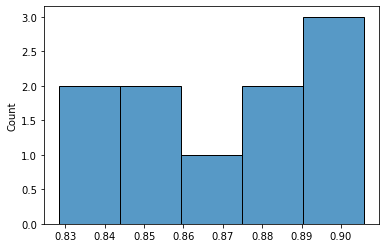

In [23]:
sns.histplot(resultados)